In [1]:
import re
import string
import lyricsgenius
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
TOKEN = 'sD0C3epnJdfOQQK4eIC45dHl-Qv7DipToGpuj1n4WeuG5_LDP1HKn31w5Cn1lOux'
genius = lyricsgenius.Genius(TOKEN)
genius.verbose = False
genius.remove_section_headers = True

In [3]:
artist = genius.search_artist("Arctic Monkeys", max_songs=5)
for song in artist.songs:
    print(song.title)

Do I Wanna Know?
Arabella
I Wanna Be Yours
R U Mine?
505


In [4]:
happier = genius.search_song('happier', 'bastille')
lyrics = happier.lyrics
print(lyrics)

Lately, I've been, I've been thinking
I want you to be happier, I want you to be happier

When the morning comes
When we see what we've become
In the cold light of day, we're a flame in the wind
Not the fire that we've begun
Every argument, every word we can't take back
'Cause with all that has happened
I think that we both know the way that this story ends

Then only for a minute
I want to change my mind
'Cause this just don't feel right to me
I wanna raise your spirits
I want to see you smile but
Know that means I'll have to leave

Know that means I'll have to leave
Lately, I've been, I've been thinking
I want you to be happier, I want you to be happier

When the evening falls
And I'm left there with my thoughts
And the image of you being with someone else
Well, it's eating me up inside
But we ran our course, we pretended we're okay
Now if we jump together, at least we can swim
Far away from the wreck we made

Then only for a minute
I want to change my mind
'Cause this just don't fee

In [5]:
stop_words = set(stopwords.words('english'))
processed_lyrics = song.lyrics.lower()
processed_lyrics = re.sub(r'\d+', '', processed_lyrics)
processed_lyrics = re.sub(r'-|\'', ' ', processed_lyrics)
processed_lyrics = ''.join(x for x in processed_lyrics if x not in string.punctuation)
tokens = word_tokenize(processed_lyrics)
processed_lyrics = ' '.join(i for i in tokens if not i in stop_words)
print(processed_lyrics)

going back seven hour flight forty five minute drive imagination waiting lying side hands thighs stop wait sec look like darling expect probably still adore hands around neck last time checked shy spark knife twists thought fall short mark frightened bite though harsher bark middle adventure perfect place start going back seven hour flight forty five minute drive imagination waiting lying side hands thighs crumble completely cry seems like greet goodbye always go spoil surprise take hands eyes soon going back seven hour flight forty five minute drive imagination waiting lying side hands thighs smile


In [6]:
analyzer = SentimentIntensityAnalyzer()
sentiment = analyzer.polarity_scores(lyrics)
print(sentiment)
ratio = sentiment['pos'] / sentiment['neg']
print(ratio)

{'neg': 0.036, 'neu': 0.768, 'pos': 0.196, 'compound': 0.9966}
5.444444444444445


In [7]:
data = pd.read_csv('models/imdb250.csv')
data = data[['Title','Genre','Plot']]
data

,Title,Genre,Plot
0,The Shawshank Redemption,"Crime, Drama",Two imprisoned men bond over a number of years...
1,The Godfather,"Crime, Drama",The aging patriarch of an organized crime dyna...
2,The Godfather: Part II,"Crime, Drama",The early life and career of Vito Corleone in ...
3,The Dark Knight,"Action, Crime, Drama",When the menace known as the Joker emerges fro...
4,12 Angry Men,"Crime, Drama",A jury holdout attempts to prevent a miscarria...
...,...,...,...
245,The Lost Weekend,"Drama, Film-Noir",The desperate life of a chronic alcoholic is f...
246,Short Term 12,Drama,A 20-something supervising staff member of a r...
247,His Girl Friday,"Comedy, Drama, Romance",A newspaper editor uses every trick in the boo...
248,The Straight Story,"Biography, Drama",An old man makes a long journey by lawn-mover ...


In [8]:
genres = {}
for s in data['Genre']:
    s = s.replace(',','')
    for g in s.split():
        if g in genres:
            genres[g] = genres[g] + 1
        else:
            genres[g] = 1

In [9]:
for k,v in genres.items():
    print(k+' : '+str(v))

Crime : 56
Drama : 169
Action : 37
Biography : 26
History : 15
Adventure : 59
Fantasy : 21
Comedy : 47
Romance : 24
Sci-Fi : 25
Mystery : 26
Family : 11
Thriller : 39
War : 15
Horror : 6
Music : 6
Animation : 16
Film-Noir : 14
Western : 7
Musical : 2
Sport : 5


In [10]:
genres = {}
for i in range(len(data)):
    p = data['Plot'][i]
    s = data['Genre'][i]
    s = s.replace(',','')
    for g in s.split():
        if g in genres:
            genres[g] = genres[g] + ' ' + p
        else:
            genres[g] = p

In [11]:
for k,v in genres.items():
    print(k+' : '+str(v)+'\n\n')

Crime : Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency. The aging patriarch of an organized crime dynasty transfers control of his clandestine empire to his reluctant son. The early life and career of Vito Corleone in 1920s New York is portrayed while his son, Michael, expands and tightens his grip on the family crime syndicate. When the menace known as the Joker emerges from his mysterious past, he wreaks havoc and chaos on the people of Gotham, the Dark Knight must accept one of the greatest psychological and physical tests of his ability to fight injustice. A jury holdout attempts to prevent a miscarriage of justice by forcing his colleagues to reconsider the evidence. The lives of two mob hit men, a boxer, a gangster's wife, and a pair of diner bandits intertwine in four tales of violence and redemption. The story of Henry Hill and his life through the teen years into the years of mafia, covering his relationshi

In [12]:
for k,v in genres.items():
    sentiment = analyzer.polarity_scores(v)
    print(k+' : '+str(sentiment))

Crime : {'neg': 0.213, 'neu': 0.7, 'pos': 0.086, 'compound': -0.9998}
Drama : {'neg': 0.206, 'neu': 0.689, 'pos': 0.105, 'compound': -1.0}
Action : {'neg': 0.172, 'neu': 0.73, 'pos': 0.098, 'compound': -0.9987}
Biography : {'neg': 0.141, 'neu': 0.733, 'pos': 0.126, 'compound': -0.919}
History : {'neg': 0.216, 'neu': 0.687, 'pos': 0.097, 'compound': -0.9955}
Adventure : {'neg': 0.155, 'neu': 0.725, 'pos': 0.12, 'compound': -0.9978}
Fantasy : {'neg': 0.122, 'neu': 0.796, 'pos': 0.081, 'compound': -0.9731}
Comedy : {'neg': 0.169, 'neu': 0.678, 'pos': 0.153, 'compound': -0.955}
Romance : {'neg': 0.121, 'neu': 0.754, 'pos': 0.125, 'compound': 0.8276}
Sci-Fi : {'neg': 0.143, 'neu': 0.777, 'pos': 0.08, 'compound': -0.9959}
Mystery : {'neg': 0.199, 'neu': 0.714, 'pos': 0.086, 'compound': -0.9981}
Family : {'neg': 0.109, 'neu': 0.73, 'pos': 0.161, 'compound': 0.9493}
Thriller : {'neg': 0.193, 'neu': 0.73, 'pos': 0.077, 'compound': -0.9993}
War : {'neg': 0.263, 'neu': 0.715, 'pos': 0.022, 'compo

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

In [14]:
romance = genres['Romance']
crime = genres['Crime']
#horror = genres['Horror']
#thriller = genres['Thriller']
#sport = genres['Sport']
#music = genres['Musical']

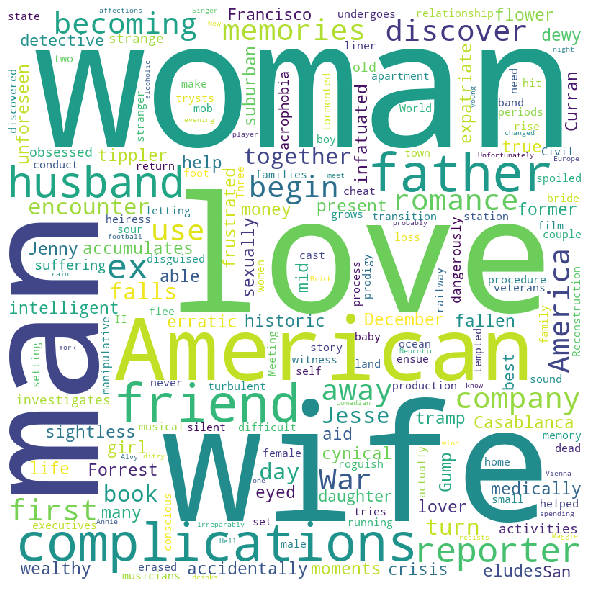

In [18]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(romance) 
                         
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

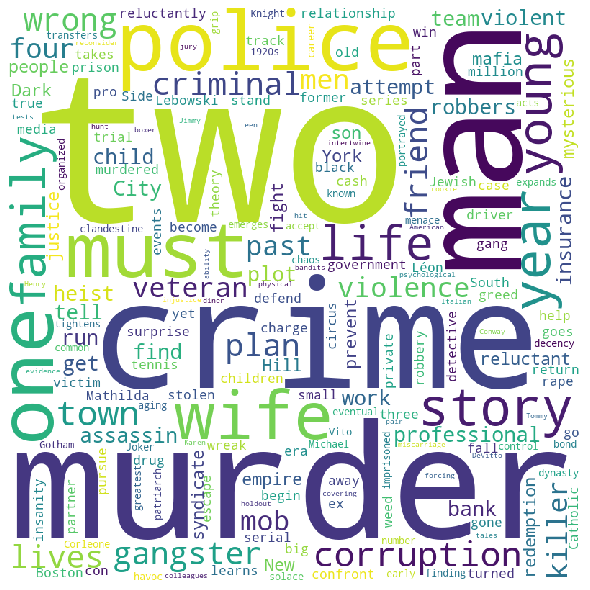

In [19]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(crime) 
                         
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()